In [8]:

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

## Split dataset into train and test

In [9]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

In [10]:

len(X_train)

60000

Text(0.5, 1.0, '5')

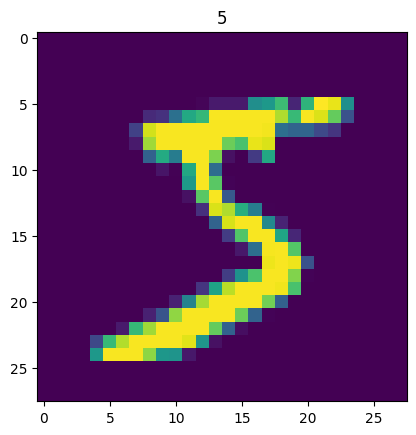

In [16]:
plt.imshow(X_train[0])
plt.title(y_train[0])

In [17]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [18]:
X_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

## without scaling image vector we got like 0.09 accuracy so need to scale image to 0 - 1 by dividing image vector 255 so we get 0 - 1 value

In [19]:

X_train = X_train / 255
X_test = X_test / 255

## Flatten 2D image to 1D vector
because, Dense array expects 1D array instead of 2D array -- eg: (60000, 28, 28) -> (6000, 728)

if used in CNN no need to flatten image

In [20]:
X_train_flattend = X_train.reshape(len(X_train), 28*28)
X_test_flattend = X_test.reshape(len(X_test), 28*28)

print(f'before flattend: {X_train.shape}  after flattend: {X_train_flattend.shape}')

before flattend: (60000, 28, 28)  after flattend: (60000, 784)


In [21]:

X_train_flattend.shape[1]

784

## Pass flattend image shape 784 to Dense Neuron and 10 as a output

In [22]:
model = models.Sequential([
    layers.Dense(10, input_shape=(X_train_flattend.shape[1],), activation='sigmoid')
])
# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# train model
model.fit(X_train_flattend, y_train, epochs=5)

/home/uzzu/Desktop/python/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
E0000 00:00:1744769271.623803   21870 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1744769271.625447   21870 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8080 - loss: 0.7308
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9142 - loss: 0.3141
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9211 - loss: 0.2813
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9247 - loss: 0.2689
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9252 - loss: 0.2676


In [23]:
model.evaluate(X_test_flattend, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9150 - loss: 0.3040


[0.26587170362472534, 0.9261999726295471]

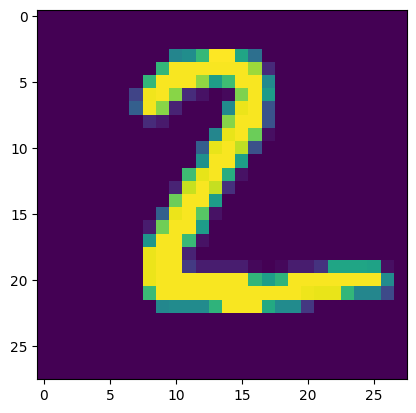

In [24]:

plt.imshow(X_test[1])

In [25]:

y_pred = model.predict(X_test_flattend)
y_pred[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([2.9250148e-01, 1.0749938e-02, 9.9946499e-01, 5.2384937e-01,
       1.4939417e-09, 7.7668738e-01, 8.6949337e-01, 1.4287823e-12,
       1.4021043e-01, 4.3894723e-09], dtype=float32)

In [26]:

np.argmax(y_pred[1])

np.int64(2)

## Confusion Matrix to evaluate model performance
convert y_pred array to class labels
from this

[3.5749575e-01,
      4.4440937e-10, 8.0310231e-01, 7.9715836e-01, 5.4810307e-13,
      1.1076180e-01, 3.9518913e-09 ] ```
To: single int

In [29]:
y_pred_labels = [np.argmax(i) for i in y_pred]

In [30]:

y_pred_labels[:3]

[np.int64(7), np.int64(2), np.int64(1)]

In [31]:
conf_mat = tf.math.confusion_matrix(y_test, y_pred_labels)
conf_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    2,    1,    0,    4,    7,    4,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   3,   10,  932,   17,    7,    2,   11,   11,   34,    5],
       [   1,    0,   19,  934,    2,   13,    2,    9,   20,   10],
       [   1,    1,    4,    1,  918,    0,    9,    3,    7,   38],
       [   9,    3,    6,   45,   12,  758,   13,    7,   32,    7],
       [   9,    3,    9,    1,    9,   11,  910,    2,    4,    0],
       [   1,    6,   21,    7,    7,    0,    0,  948,    2,   36],
       [   6,   11,    8,   31,    9,   23,    9,   12,  854,   11],
       [   9,    7,    1,   10,   26,    6,    0,   15,    6,  929]],
      dtype=int32)>

## Visualize of Confusion Matrix

In [32]:

import seaborn as sns


## Confusion Matrix Visualization
 -true label was 0 and model predicted 955 time corret without errors
 -true label was 1 and model predicted 1117 times correct
 -true label was 2 but model predicted 10 times 6 ( error )
 -true label was 7 but model predicted 36 times 9 ( error )
*** Anything that is not in Diagnol is Errors ***

Text(50.722222222222214, 0.5, 'Y_true ')

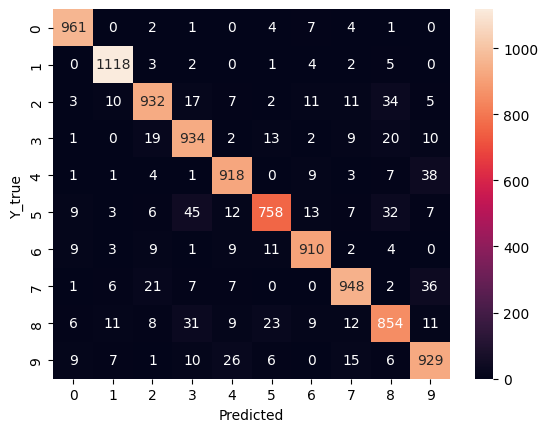

In [33]:

sns.heatmap(conf_mat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Y_true ')

## Add Hidden Layers to decrease errors

In [34]:
model2 = models.Sequential([
    layers.Dense(50, input_shape=(X_train_flattend.shape[1],), activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model2.fit(X_train_flattend, y_train, epochs=5)
     

/home/uzzu/Desktop/python/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8510 - loss: 0.5351
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9498 - loss: 0.1769
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9622 - loss: 0.1267
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9710 - loss: 0.0994
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9759 - loss: 0.0791


In [35]:
model2.evaluate(X_test_flattend, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9615 - loss: 0.1222


[0.10453999042510986, 0.9670000076293945]

In [36]:

y_pred2 = model2.predict(X_test_flattend)
y_pred2[3]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([9.9989718e-01, 7.6691725e-04, 1.9911641e-01, 7.5571291e-02,
       2.9813976e-03, 3.6118749e-01, 5.7724193e-02, 1.1234166e-01,
       4.2594876e-04, 1.8644527e-02], dtype=float32)

In [37]:
np.argmax(y_pred2[3])

np.int64(0)

Text(0.5, 1.0, '0')

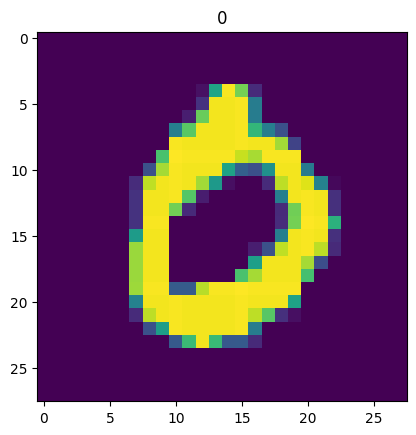

In [38]:
plt.imshow(X_test[3])
plt.title(y_test[3])

## Model2 Confusion Matrix

In [39]:
y_pred_labels2 = [np.argmax(i) for i in y_pred2]

In [40]:

conf_mat2  = tf.math.confusion_matrix(y_test, y_pred_labels2)

Text(50.722222222222214, 0.5, 'True Value')

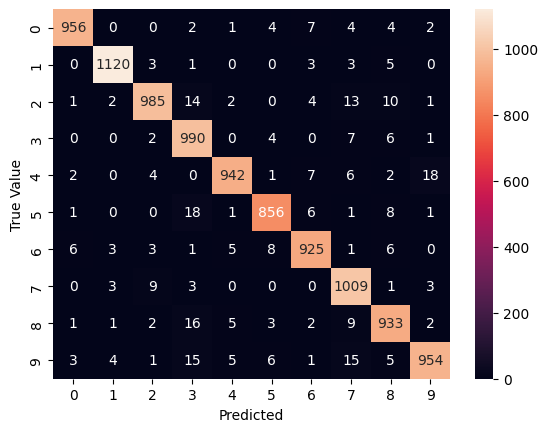

In [41]:
sns.heatmap(conf_mat2, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True Value')

## Flatten image shape from 2D to 1D using keras default method

In [42]:
model3 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(50, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model3.fit(X_test, y_test, epochs=5)

Epoch 1/5


/home/uzzu/Desktop/python/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6990 - loss: 1.0394
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9190 - loss: 0.2905
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9371 - loss: 0.2258
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9467 - loss: 0.1866
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9552 - loss: 0.1563
